In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import transbigdata as tbd
import warnings
import random
# 设置numpy的随机种子
np.random.seed(42)

# 设置random模块的随机种子
random.seed(42)

warnings.filterwarnings('ignore')

road_path = 'shanghai_road2.graphml'
traj_path = 'traj_20w.csv'
useroad = 'false'
config = 'config.json'
charge_station_path = 'zcm_station_new2.csv'
simulated_vehicle_nums = 1000
taskname = '11_15_v2'
numdays = 7

if useroad == 'false':
    useroad = False
else:
    useroad = True
road_path = f'./Files/SimUrbanRoad/{road_path}'
traj_path = f'./Files/Trajectory/{traj_path}'
charge_station_path = f'./Files/UrbanStation/{charge_station_path}'
config_path = f'./Files/SimUrbanConfig/{config}'
simulated_vehicle_nums = int(simulated_vehicle_nums)
sample_nums = 10
taxi_rate = 0.1
is_auto_tune = True
# -------------此处为仿真的代码---------------
from Models.urban_abm.main import simulation_urban

simulation_urban(traj_path=traj_path,
                charge_station_path=charge_station_path,
                config_path=config_path,
                useroad = useroad,
                road_path = road_path,
                simulated_vehicle_nums=simulated_vehicle_nums,
                numdays = numdays,
                sample_nums=sample_nums,
                taxi_rate=taxi_rate,
                version=taskname,
                is_auto_tune=is_auto_tune
                )

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/
整理出租车订单
为出租车分配订单
为出租车分配班次
分配完成，总共 3 辆出租车
提取出租车出行链
初始化充电站中...
初始化充电站完成，共计 1561 个
初始化非营运车辆完成，共计 1000 辆
初始化营运车辆完成，共计 0 辆
初始化环境中...
初始化环境完成
========================模型信息========================
仿真步长：5分钟
仿真步数：2016步
仿真天数：7天
车辆数量：1000辆
充电站数量：1561
是否采用路网：False
========================开始仿真========================


正在仿真：: 100%|██████████| 2016/2016 [00:11<00:00, 182.31it/s]


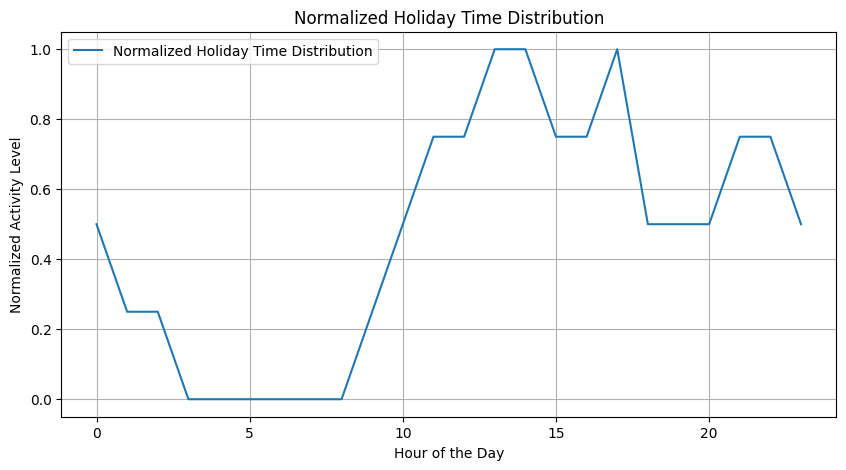

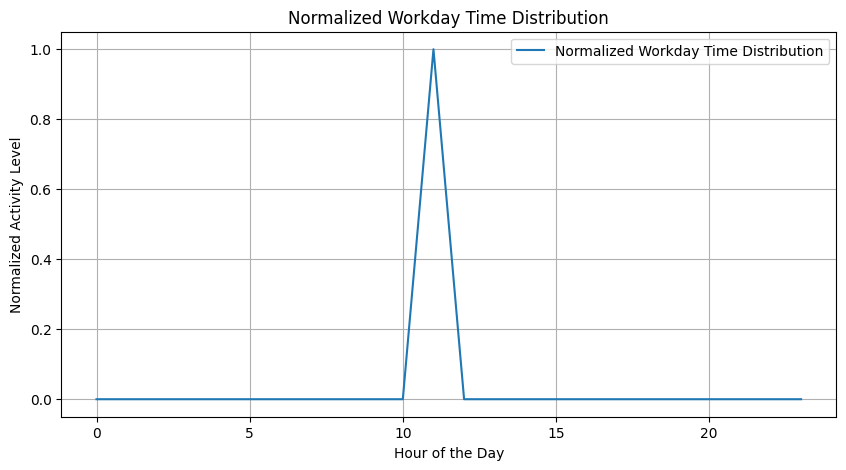

In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

# 函数用于归一化数据
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# 使用pickle读取数据
with open(r'C:\Users\30684\Desktop\python项目\SmartEV-HUAWEI\backend\Files\SimUrbanResult\holiday_time_distribution.pkl', 'rb') as f:
    holiday_time_distribution = pickle.load(f)

with open(r'C:\Users\30684\Desktop\python项目\SmartEV-HUAWEI\backend\Files\SimUrbanResult\workday_time_distribution.pkl', 'rb') as f:
    workday_time_distribution = pickle.load(f)

# 归一化数据
normalized_holiday_time_distribution = normalize(holiday_time_distribution)
normalized_workday_time_distribution = normalize(workday_time_distribution)

# 绘制Holiday的折线图
plt.figure(figsize=(10, 5))
plt.plot(normalized_holiday_time_distribution, label='Normalized Holiday Time Distribution')
plt.title('Normalized Holiday Time Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Normalized Activity Level')
plt.legend()
plt.grid(True)
plt.show()

# 绘制Workday的折线图
plt.figure(figsize=(10, 5))
plt.plot(normalized_workday_time_distribution, label='Normalized Workday Time Distribution')
plt.title('Normalized Workday Time Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Normalized Activity Level')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# 归一化函数
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# 绘制折线图的函数
def plot_time_distribution(real_time_distribution, sim_time_distribution, title):
    plt.figure(figsize=(10, 5))
    
    # 归一化数据
    real_time_distribution = normalize(real_time_distribution)
    sim_time_distribution = normalize(sim_time_distribution)
    
    # 绘制折线图
    plt.plot(real_time_distribution, label='Normalized Real Time Distribution')
    plt.plot(sim_time_distribution, label='Normalized Sim Time Distribution')
    
    # 添加图表标题和标签
    plt.title(title)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Normalized Activity Level')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
import pandas as pd 
workday_real_order = pd.read_csv(r'C:\Users\30684\Desktop\python项目\SmartEV-HUAWEI\backend\Models\urban_abm\pred_data\full_hour_total_100_workday.csv')
holiday_real_order = pd.read_csv(r'C:\Users\30684\Desktop\python项目\SmartEV-HUAWEI\backend\Models\urban_abm\pred_data\full_hour_total_100_holiday.csv')

In [ ]:
workday_real_order_agg = workday_real_order.groupby(['hour'])['order'].sum().reset_index()
holiday_real_order_agg = holiday_real_order.groupby(['hour'])['order'].sum().reset_index()

In [ ]:
sum(workday_time_distribution)

2

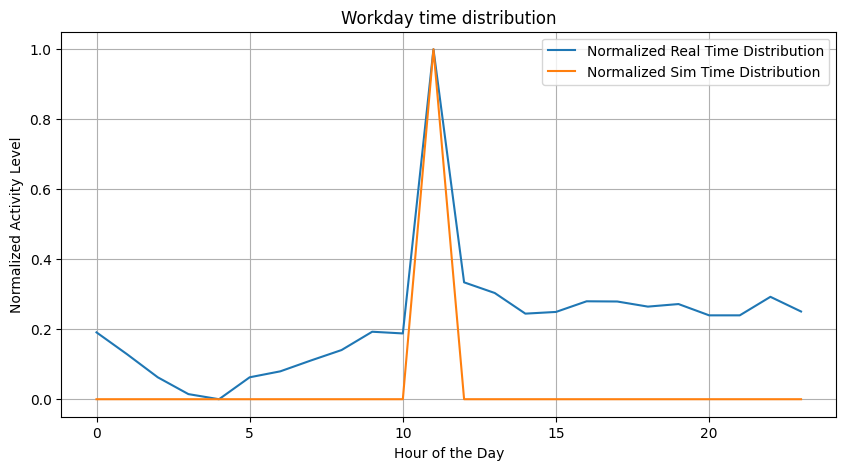

In [ ]:
plot_time_distribution(workday_real_order_agg['order'].values,normalized_workday_time_distribution,'Workday time distribution')

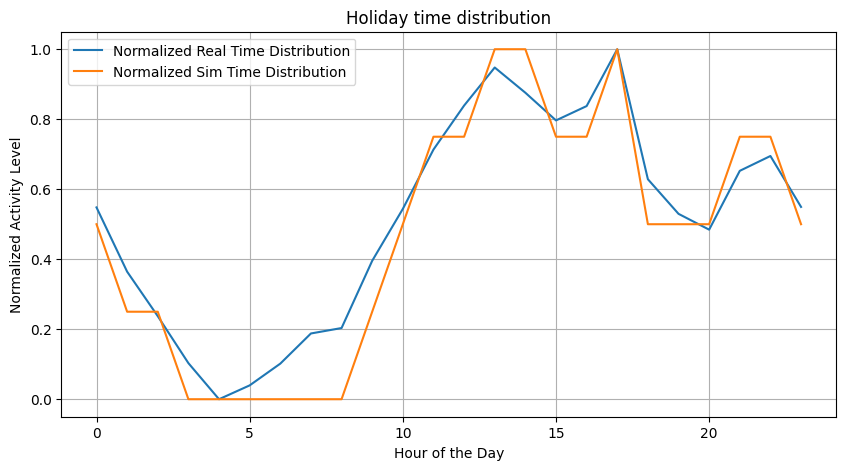

In [ ]:
plot_time_distribution(holiday_real_order_agg['order'].values,normalized_holiday_time_distribution,'Holiday time distribution')

In [ ]:
sum(holiday_time_distribution)

45

In [ ]:
sum(workday_time_distribution)

2

In [ ]:
sum(holiday_time_distribution)

45